## 2. Ridge & Lasso (1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

#### 데이터 불러오기

In [2]:
Iris = load_iris()

df = pd.DataFrame(data = np.c_[Iris['data'], Iris['target']], columns = Iris['feature_names']+['target'])
df['target'] = df['target'].map({0:'setosa', 1:'versicolor', 2: 'virginica'})
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'target']

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Covariance Matrix

In [4]:
x = df.loc[:,['sepal length', 'sepal width', 'petal length', 'petal width']].values
y = df.loc[:,['target']].values

In [9]:
features = x.T
cov_mat = np.cov(features)

In [10]:
cov_mat

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

eigen value & eigen vector

In [6]:
eig_val, eig_vec = np.linalg.eig(covariance_matrix)

In [12]:
eig_vec

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])

In [13]:
eig_val

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

#### PCA

In [14]:
pca = PCA(n_components = 2) 

In [15]:
pc = pca.fit_transform(x)
pc_df = pd.DataFrame(data = pc, columns = ['pc1','pc2'])
pc_df.head()

,pc1,pc2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [16]:
pc_df2 = pd.concat([pc_df, df[['target']]], axis = 1)
pc_df2.head()

,pc1,pc2,target
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa


In [17]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

### Visualization

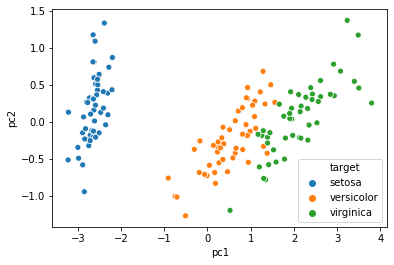

In [19]:
sns.scatterplot(x = 'pc1',y='pc2',hue='target',data=pc_df2)